# Kraggle Competition - Titanic 

## Env vars

In [1]:
IN_KRAGGLE_ENV = False

## Load data

### Unzip

In [2]:
from zipfile import ZipFile

In [3]:
if not IN_KRAGGLE_ENV:
    with ZipFile('./data/raw/titanic.zip', 'r') as zip:
        zip.extractall('./data/interim')

### Read CSVs

In [4]:
BASE = '/kaggle/input/titanic/' if IN_KRAGGLE_ENV else './data/interim/'
TRAIN_CSV = BASE + 'train.csv'
TEST_CSV = BASE + 'test.csv'

In [5]:
import pandas as pd

#### Train

In [6]:
df_train = pd.read_csv(TRAIN_CSV)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Test

In [7]:
df_test = pd.read_csv(TEST_CSV)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploratory Data Analysis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

### Concat datasets to explore

In [9]:
df_passengers = pd.concat([df_train, df_test]).reset_index(drop=True)


In [10]:
df_passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df_passengers.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


### Discover data types

In [12]:
df_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


### Check for unique values

> Identify categorical columns

In [13]:
for column in df_passengers.columns:
    print(column, df_passengers[column].unique())
    print('-' * 50)

PassengerId [   1    2    3 ... 1307 1308 1309]
--------------------------------------------------
Survived [ 0.  1. nan]
--------------------------------------------------
Pclass [3 1 2]
--------------------------------------------------
Name ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' ... 'Saether, Mr. Simon Sivertsen'
 'Ware, Mr. Frederick' 'Peter, Master. Michael J']
--------------------------------------------------
Sex ['male' 'female']
--------------------------------------------------
Age [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   1

In [14]:
categorical_colums = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

### Count plots

/tmp/ipykernel_12190/2205372214.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

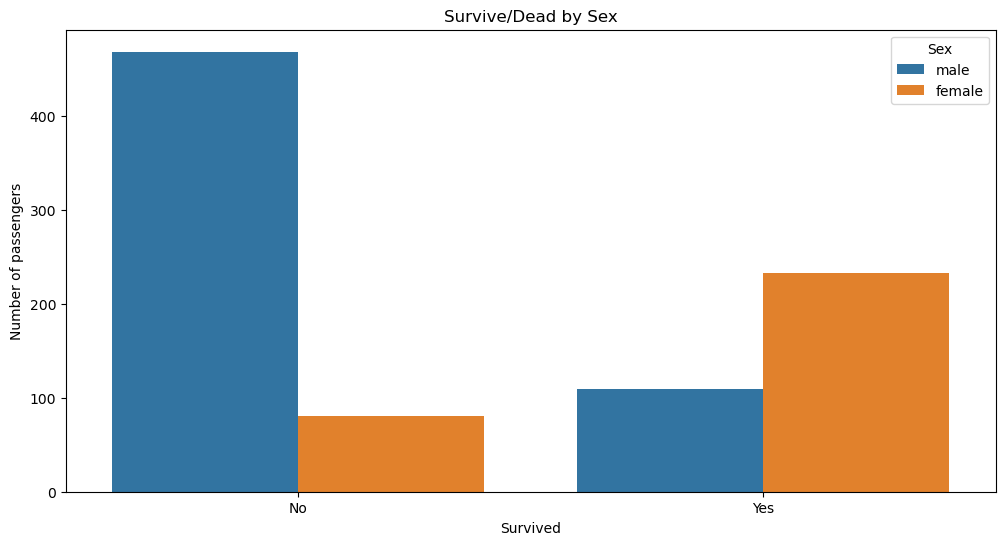

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(df_passengers,
              x='Survived',
              hue='Sex')

ax.set_title('Survive/Dead by Sex')
ax.set_xlabel('Survived')
ax.set_ylabel('Number of passengers')
ax.set_xticklabels(['No', 'Yes'])

Text(0, 0.5, 'Number of passengers')

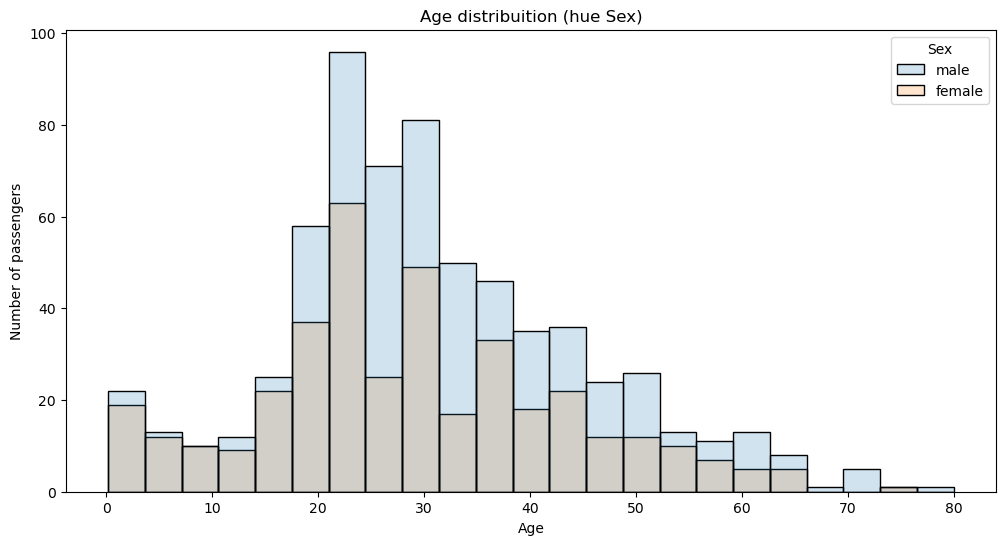

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df_passengers,
              x='Age',
              hue='Sex',
              alpha=.2)

ax.set_title('Age distribuition (hue Sex)')
ax.set_xlabel('Age')
ax.set_ylabel('Number of passengers')

Text(0, 0.5, 'Number of passengers')

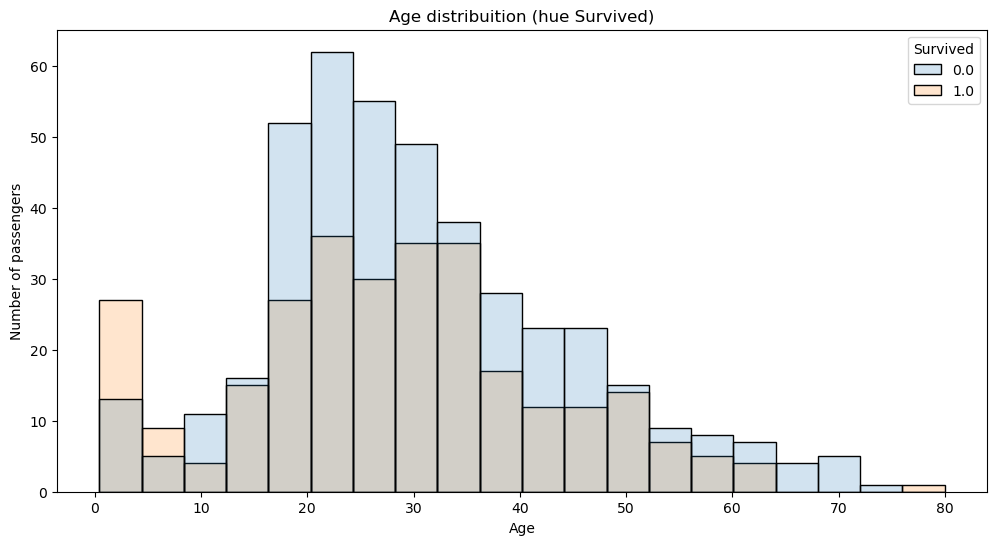

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df_passengers,
              x='Age',
              hue='Survived',
              alpha=.2)

ax.set_title('Age distribuition (hue Survived)')
ax.set_xlabel('Age')
ax.set_ylabel('Number of passengers')

## Data hangling

In [18]:
import numpy as np

### Train set

In [19]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* Train set
  * Age will be dropped
  * Cabin will be dropped
  * Embarked will be replaced with the mode

#### Drop `Age` and `Cabin` columns

In [20]:
df_train.drop(['Age', 'Cabin'], axis=1, inplace=True)

#### Fill `Embarked` column with the mode

In [21]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

#### Check train set for _nan_ values

In [22]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Test set

In [23]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

* Test set
  * Age will be dropped
  * Ticket will be dropped
  * Fare will be filled with the mean
  * Cabin will be dropped

#### Drop `Age` and `Cabin` columns 

In [24]:
df_test.drop(['Age', 'Cabin'], axis=1, inplace=True)

#### Fill `Fare` with the mean

In [25]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

#### Check test set for _nan_ values

In [26]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Drop `Ticket` column

In [27]:
df_train.drop('Ticket', axis=1, inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S


In [28]:
df_test.drop('Ticket', axis=1, inplace=True)
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,12.2875,S


#### Create `Title` column

In [29]:
df_train['Title'] = df_train['Name'].str.extract(r',\s(.*)\.')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,Mr


In [30]:
df_test['Title'] = df_test['Name'].str.extract(r',\s(.*)\.')
df_test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,0,0,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,0,0,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,12.2875,S,Mrs


In [31]:
categorical_colums.append('Title')

#### Drop `Name` column

In [32]:
df_train.drop('Name', axis=1, inplace=True)
df_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,1,0,7.2500,S,Mr
1,2,1,1,female,1,0,71.2833,C,Mrs
2,3,1,3,female,0,0,7.9250,S,Miss
3,4,1,1,female,1,0,53.1000,S,Mrs
4,5,0,3,male,0,0,8.0500,S,Mr


In [33]:
df_test.drop('Name', axis=1, inplace=True)
df_test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,0,0,7.8292,Q,Mr
1,893,3,female,1,0,7.0000,S,Mrs
2,894,2,male,0,0,9.6875,Q,Mr
3,895,3,male,0,0,8.6625,S,Mr
4,896,3,female,1,1,12.2875,S,Mrs


### Split train dataset into X and y

In [34]:
X = df_train.drop(['PassengerId', 'Survived'], axis=1)
y = df_train['Survived']

## Preprocessing

In [35]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

### OneHotEncoder for X

In [36]:
one_hot = make_column_transformer(
    (OneHotEncoder(drop='if_binary', handle_unknown='ignore'),
    categorical_colums),
    remainder='passthrough',
    sparse_threshold=0
)

In [37]:
X_columns = X.columns

In [38]:
X = one_hot.fit_transform(X)

In [39]:
one_hot.get_feature_names_out(X_columns)

array(['onehotencoder__Pclass_1', 'onehotencoder__Pclass_2',
       'onehotencoder__Pclass_3', 'onehotencoder__Sex_male',
       'onehotencoder__SibSp_0', 'onehotencoder__SibSp_1',
       'onehotencoder__SibSp_2', 'onehotencoder__SibSp_3',
       'onehotencoder__SibSp_4', 'onehotencoder__SibSp_5',
       'onehotencoder__SibSp_8', 'onehotencoder__Parch_0',
       'onehotencoder__Parch_1', 'onehotencoder__Parch_2',
       'onehotencoder__Parch_3', 'onehotencoder__Parch_4',
       'onehotencoder__Parch_5', 'onehotencoder__Parch_6',
       'onehotencoder__Embarked_C', 'onehotencoder__Embarked_Q',
       'onehotencoder__Embarked_S', 'onehotencoder__Title_Capt',
       'onehotencoder__Title_Col', 'onehotencoder__Title_Don',
       'onehotencoder__Title_Dr', 'onehotencoder__Title_Jonkheer',
       'onehotencoder__Title_Lady', 'onehotencoder__Title_Major',
       'onehotencoder__Title_Master', 'onehotencoder__Title_Miss',
       'onehotencoder__Title_Mlle', 'onehotencoder__Title_Mme',
       '

In [40]:
pd.DataFrame(X, columns=one_hot.get_feature_names_out(X_columns))

,onehotencoder__Pclass_1,onehotencoder__Pclass_2,onehotencoder__Pclass_3,onehotencoder__Sex_male,onehotencoder__SibSp_0,onehotencoder__SibSp_1,onehotencoder__SibSp_2,onehotencoder__SibSp_3,onehotencoder__SibSp_4,onehotencoder__SibSp_5,...,onehotencoder__Title_Mlle,onehotencoder__Title_Mme,onehotencoder__Title_Mr,onehotencoder__Title_Mrs,onehotencoder__Title_Mrs. Martin (Elizabeth L,onehotencoder__Title_Ms,onehotencoder__Title_Rev,onehotencoder__Title_Sir,onehotencoder__Title_the Countess,remainder__Fare
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.2500
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,71.2833
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.9250
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,53.1000
4,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0000
887,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0000
888,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.4500
889,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0000


### LabelEncoder for y

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
label_encoder = LabelEncoder()

In [43]:
y = label_encoder.fit_transform(y)

## Model selection

### Split into train and test

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.3,
                                                    stratify=y,
                                                    random_state=7)

### Baseline classifier with DummyClassifier

In [46]:
from sklearn.dummy import DummyClassifier

In [47]:
model_dummy = DummyClassifier()
model_dummy.fit(X_train, y_train)

DummyClassifier()

In [48]:
y_hat_dummy = model_dummy.predict(X_test)

### Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model_rf = RandomForestClassifier(n_estimators=150,
                                  max_depth=20,
                                  min_samples_split=2,
                                  min_samples_leaf=2,
                                  random_state=0)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=150,
                       random_state=0)

In [51]:
y_hat_rf = model_rf.predict(X_test)

### Model metrics avaliation

In [52]:
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import ConfusionMatrixDisplay

In [53]:
def plot_roc_curve(y_true, y_pred):
    fpr, tpr, threshold = roc_curve(y_true, y_pred)
    
    fig, ax = plt.subplots(figsize=(5, 5))

    axs = plt.plot(fpr, tpr,
                   color='darkorange',
                   lw=2,
                   linestyle='-',
                   label=f'AUC: {auc(fpr, tpr):.2f}')

    plt.plot([0, 1], [0, 1],
                color='navy',
                lw=2,
                linestyle='--')

    plt.title('ROC Curve')
    plt.xlabel('True positive rate')
    plt.ylabel('False positive rate')

    plt.legend()

#### Dummy Classifier

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       165
           1       0.00      0.00      0.00       103

    accuracy                           0.62       268
   macro avg       0.31      0.50      0.38       268
weighted avg       0.38      0.62      0.47       268



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


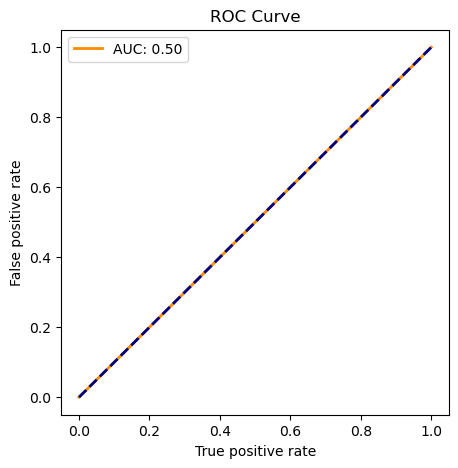

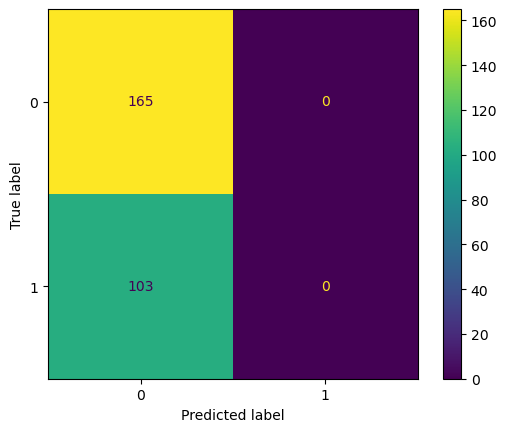

In [54]:
print(classification_report(y_test, y_hat_dummy))
plot_roc_curve(y_test, y_hat_dummy)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_dummy)

#### Random Forest Classifier

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       165
           1       0.80      0.68      0.73       103

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



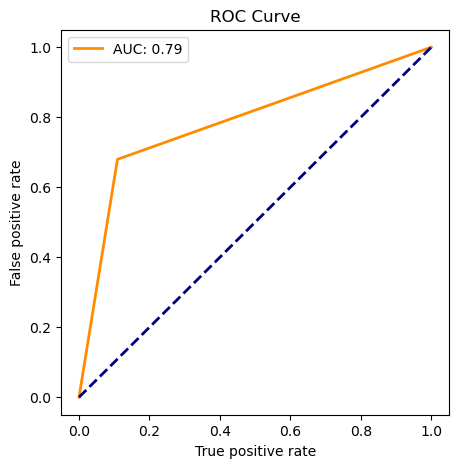

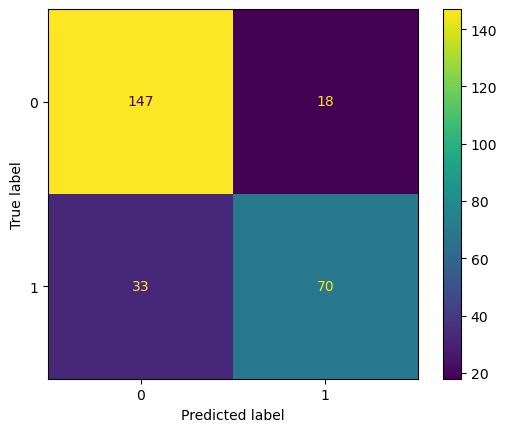

In [55]:
print(classification_report(y_test, y_hat_rf))
plot_roc_curve(y_test, y_hat_rf)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_rf)

## Model hyperparameter tuning

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [57]:
param_grid = {'n_estimators': [100, 150, 200, 250, 300],
              'max_depth': [2, 4, 6, 8, 10, 15, 20],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 2]}

In [58]:
grid_cv = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                       param_grid=param_grid,
                       scoring='accuracy',
                       cv=StratifiedKFold(5, shuffle=True, random_state=0))
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 15, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='accuracy')

In [59]:
y_hat_cv = grid_cv.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       165
           1       0.80      0.66      0.72       103

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268



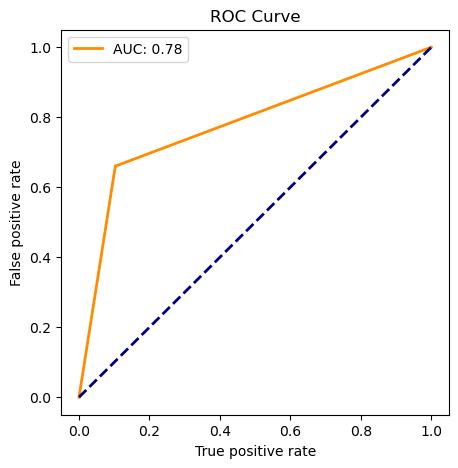

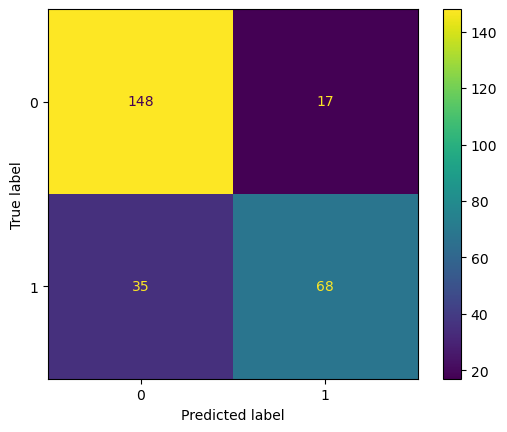

In [60]:
print(classification_report(y_test, y_hat_cv))
plot_roc_curve(y_test, y_hat_cv)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_cv)

In [61]:
grid_cv.best_params_

{'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

## Predict with Test values

In [62]:
predictions = grid_cv.best_estimator_.predict(one_hot.transform(df_test.drop('PassengerId', axis=1)))

/opt/conda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [3, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Save predictions

In [63]:
SAVE_BASE_PATH = '/kaggle/working/' if IN_KRAGGLE_ENV else './data/processed/'

pd.DataFrame({'PassengerId': df_test['PassengerId'],
              'Survived': predictions}).to_csv(SAVE_BASE_PATH + 'submission.csv', index=False)

### Save model and encoder

In [64]:
import pickle

In [65]:
if not IN_KRAGGLE_ENV:

    # Save encoder
    with open('./models/encoder.pkl', 'wb') as file:
        pickle.dump(one_hot, file)
        file.close()
    
    # Save encoder
    with open('./models/model_rf', 'wb') as file:
        pickle.dump(grid_cv.best_estimator_, file)
        file.close()